<a href="https://colab.research.google.com/github/idamerce/moroccan-traffic-signs/blob/master/Copy_of_moroccan_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# getting data from drive ANd training testion WORKING MODEL

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import zipfile

directory_to_extract_to="/content/data"
for i in range(2,46,2):
  file=str(i)+str(i+1)
  print("---->",file)
  try:
    path_to_zip_file="/content/drive/My Drive/moroccan trafic dataset/"+file+".zip"
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
       zip_ref.extractall(directory_to_extract_to)
  except:
    print("error")


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [ ]:
data = []
labels = []
classes = 46
cur_path = "/content/data" #os.getcwd() 

#Retrieving the images and their labels 
for folder in os.listdir(cur_path):
    path = os.path.join(cur_path,str(folder))
    images = os.listdir(path)
    for a in images:
      print(a)
      try:
        image = Image.open(path + '/'+ a).convert('RGB')
        image = image.resize((30,30))
        image = np.array(image)
        sim = Image.fromarray(image)
        data.append(image)
        labels.append(folder)
      except:
        print("Error loading image")
        
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46  ) 

Streaming output truncated to the last 5000 lines.
00038_00020_00026.png
00038_00047_00024.png
00038_00008_00007.png
00038_00037_00011.png
00038_00045_00003.png
00038_00016_00016.png
00038_00028_00018.png
00038_00032_00008.png
00038_00052_00013.png
00038_00059_00021.png
00038_00055_00026.png
00038_00055_00002.png
00038_00054_00020.png
00038_00039_00013.png
00038_00036_00020.png
00038_00021_00003.png
00038_00055_00018.png
00038_00060_00008.png
00038_00033_00009.png
00038_00001_00003.png
00038_00020_00001.png
00038_00037_00022.png
00038_00064_00027.png
00038_00000_00011.png
00038_00023_00011.png
00038_00068_00004.png
00038_00011_00021.png
00038_00049_00018.png
00038_00057_00023.png
00038_00024_00017.png
00038_00061_00011.png
00038_00054_00024.png
00038_00067_00022.png
00038_00018_00013.png
00038_00056_00004.png
00038_00031_00026.png
00038_00058_00029.png
00038_00064_00001.png
00038_00024_00002.png
00038_00049_00026.png
00038_00026_00011.png
00038_00061_00004.png
00038_00033_00015.png
000

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

model.save("moroccan_traffic_category.h5")

Epoch 1/30
947/947 [==============================] - 128s 135ms/step - loss: 1.9726 - accuracy: 0.5297 - val_loss: 0.3937 - val_accuracy: 0.9101
Epoch 2/30
947/947 [==============================] - 124s 130ms/step - loss: 0.5388 - accuracy: 0.8475 - val_loss: 0.1530 - val_accuracy: 0.9610
Epoch 3/30
947/947 [==============================] - 124s 131ms/step - loss: 0.3384 - accuracy: 0.9066 - val_loss: 0.0898 - val_accuracy: 0.9771
Epoch 4/30
947/947 [==============================] - 123s 130ms/step - loss: 0.2589 - accuracy: 0.9295 - val_loss: 0.0587 - val_accuracy: 0.9847
Epoch 5/30
947/947 [==============================] - 123s 130ms/step - loss: 0.2455 - accuracy: 0.9344 - val_loss: 0.0719 - val_accuracy: 0.9807
Epoch 6/30
947/947 [==============================] - 126s 133ms/step - loss: 0.2151 - accuracy: 0.9448 - val_loss: 0.0566 - val_accuracy: 0.9861
Epoch 7/30
947/947 [==============================] - 123s 129ms/step - loss: 0.2225 - accuracy: 0.9421 - val_loss: 0.0487 -

In [ ]:
pip install gtts

In [ ]:
from keras.models import load_model
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio  
import tensorflow as tf
from keras_preprocessing import image

model = load_model('moroccan_traffic_category.h5')
#dictionary to label all traffic signs class.
classes = { 1:'السرعة محدودة في عشرين كيلومتر فالساعة',
            2:'السرعة محدودة في ثلاثين كيلومتر فالساعة', 
            3:'السرعة محدودة في خمسين كيلومتر فالساعة',
            4:'السرعة محدودة في ستين كيلومتر فالساعة',
            5:'السرعة محدودة في سبعين كيلومتر فالساعة',
            6:'السرعة محدودة في ثمانين كيلومتر فالساعة',
            7:'نهاية منع محدودية السرعة قثمانين كلمتر فالساعة',
            8:'السرعة محدودة في مئة كيلومتر فالساعة',
            9:'السرعة محدودة في منة و عشرين كيلومتر فالساعة', 
            10:'ممنوع التجاوز', 
            11:'ممنوع التجاوز على الحافلات اللتي يتحاوز وونها 3.5 طن', 
            12:'الصغيرة فالكبيرة', 
            13:'ممنوع الوقوف أو التوقف', 
            14:'أعط الأسبقية', 
            15:'علامة التوقف', 
            16:'ممنوع المرور في الاتجاهين', 
            17:'ممنوع المرور بالنسبة للشاحنات اللي تفوق 3.5 طن', 
            18:'ممنوع المرور', 
            19:'انتباه خطر متنوع', 
            20:'منعرج خطير على اليسار', 
            21:'منعرج خطير على اليمين',
            22:'منعرج على اليسار ثم اليمين', 
            23:'طريق مسنم', 
            24:'طريق زالق', 
            25:'طريق ضيق من اليمين',
            26:'أشغال على الطريق', 
            27:'اشارات المرور', ################
            28:'مرور الراجلين', 
            29:'مرور الأطفال',
            30:'مرور الدراجات', 
            31:'ممنوع التوقف',################
            32:'مرور حيوانات متوحشة', 
            33:'نهاية المنع', 
            34:'اتجاه إجباري علي اليمين', 
            35:'اتجاه إجباري علي يسار', 
            36:'نتبع السهم على طول', 
            37:'أتبع السهم في ملتقى الطرق على طول أو اليمين', 
            38:'أتبع السهم في ملتقى الطرق على طول أو اليسار', 
            39:'إنعطاف إجباري على اليمين', 
            40:'إنعطاف إجباري على اليسار', 
            41:'إتجاه إجباري نتبع السهم على اليسار مع خفض السرعة', 
            42:'نهاية منع التجاوز', 
            43:'نهاية منع التجاوز على الشاحنات التي يتجاوز وزنها 3.5 طن',
            44:'طريق ضيق من اليسار',################            
            45:'منعرج على اليمين ثم اليسار',################
            46:'طريق ضيق'} 

def class_to_voice(classes,language):
  sound_path="traffic_sound_signs_"+language
  try:
    os.mkdir(sound_path)
  except:
    print("Error :cannot create this file my be already exist")
  for i in range(len(classes)):
    i=i+1
    print(i)
    engine = gTTS(classes[i],lang=language) 
    sound_file='a'+str(i)+'.wav' 
    print(sound_file)
    try:
      engine.save(sound_path+"/"+sound_file) 
      #Audio(sound_file, autoplay=True) 
    except:
      print("Error creating ",sound_file)


#class_to_voice(classes,'ar')


def say_it(output):
  engine = gTTS(output)  
  engine.save('a1.wav') 
  sound_file = 'a1.wav'
  Audio(sound_file, autoplay=True) 

def classify(file_path):
    global label_packed
    img = image.load_img(file_path, target_size=(30, 30))
    img = np.expand_dims(img, axis=0)
    img = np.array(img)
    pred = model.predict_classes([img])[0]
    sign = classes[pred+1]
    sound_sign='/content/traffic_sound_signs_en/a'+str(pred+1)+'.wav'
    Audio(sound_sign, autoplay=True) 
    print(sign)
    #plt.imshow(img)
    return sound_sign


def classify_arabic(file_path):
    global label_packed
    img = image.load_img(file_path, target_size=(30, 30))
    img = np.expand_dims(img, axis=0)
    img = np.array(img)
    pred = model.predict_classes([img])[0]
    sign = classes[pred+1]
    sound_sign='/content/traffic_sound_signs_ar/a'+str(pred+1)+'.wav'
    print(sign)
    #plt.imshow(img)
    return sound_sign

أشغال على الطريق


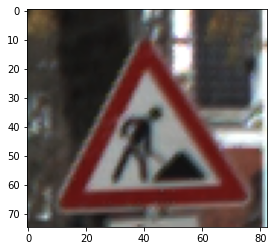

In [ ]:
#ARABIC TEST

from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio

#predict_this_image="/content/00005.png"
predict_this_image="/content/00044_00004_00025.png"
predict_this_image="/content/00005.png"
predict_this_image="/content/00164.png"
predict_this_image="/content/00291.png"
predict_this_image="/content/00573.png"
predict_this_image="/content/00613.png"
predict_this_image="/content/00623.png" #this not exist in my model
predict_this_image="/content/00640.png"
predict_this_image="/content/00929.png"
predict_this_image="/content/01033.png"
predict_this_image="/content/01204.png"
predict_this_image="/content/01480.png"

imageh = Image.open(predict_this_image)
plt.imshow(imageh)
Audio(classify_arabic(predict_this_image), autoplay=True)


In [ ]:
pred = model.predict_classes([img])[0]
sign = MyClasses[pred+1]
print(sign)